In [1]:
from dadaC import *
import matplotlib.pyplot as plt
import numpy as np

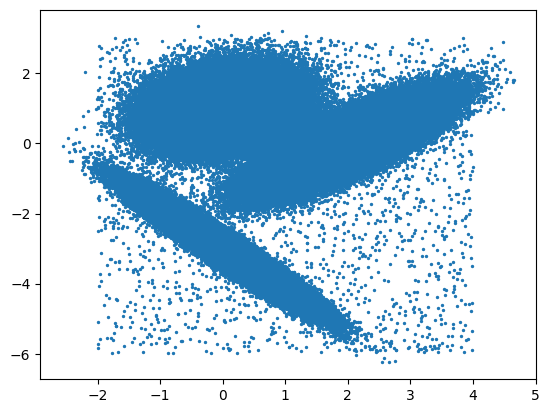

In [2]:
n = 100000
d1 = np.random.multivariate_normal([0,1],cov = 0.3*np.array([[1,0.2],[0.2,1]]), size = n)
d2 = np.random.multivariate_normal([0,-3],cov = 0.5*np.array([[0.7,-0.8],[-0.8,1]]), size = n*2)
d3 = np.random.multivariate_normal([2,0],cov = 0.4*np.array([[1,0.75],[0.75,0.9]]), size = n*2)
d4 = np.array([np.random.uniform(-2,4,2000), np.random.uniform(-6,3,2000)]).T

d = np.concatenate([d1,d2,d3,d4])
plt.scatter(d[:,0], d[:,1], s = 2)

In [3]:
data = Data(d)
data.computeNeighbors_vptree(200)
data.computeIDtwoNN()
data.computeDensity()
data.computeClusteringADP(Z = 3)

Building the vp tree
	Total time: 0.000s

KNN search
	Total time: 4.099s

ID estimation:
	ID value: 2.009825
	Total time: 0.158s

Density and k* estimation:
	Total time: 2.678s

H1: Preliminary cluster assignment
	Finding putative centers: 0.080s
	Finding actual centers:   0.355s
	Tentative clustering:     0.094s
	Finalizing clustering:    0.000s

	Found 527 clusters
	Total time: 0.530s

H2: Finding border points
	Total time: 0.516s

Using dense implementation
H3: Merging clusters
	Finding merges:   0.000s
	Cluster merging:  0.001s
	Final operations: 0.006s

	Found 1331 possible merges
	Surviving clusters 3
	Total time: 0.007s



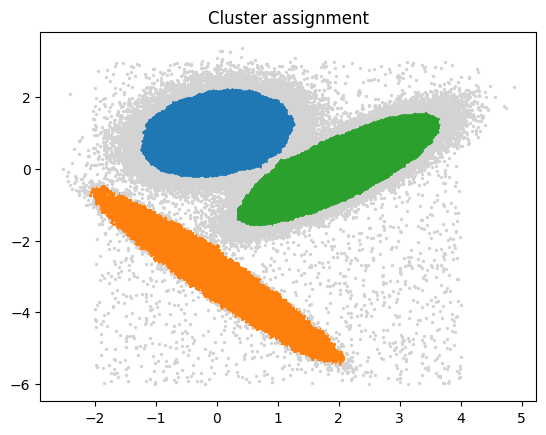

In [5]:
clusterLabels = data.getClusterAssignment()

for cl in set(clusterLabels):
    #print(cl)
    mask = np.where(clusterLabels == cl)
    if cl != -1:
        plt.scatter(data.data[mask,0], data.data[mask,1], s = 2)
    else:
        plt.scatter(data.data[mask,0], data.data[mask,1], s = 2, c = 'lightgray')
plt.title("Cluster assignment")
plt.show()
#plt.legend()

Text(0.5, 1.0, 'Density profile')

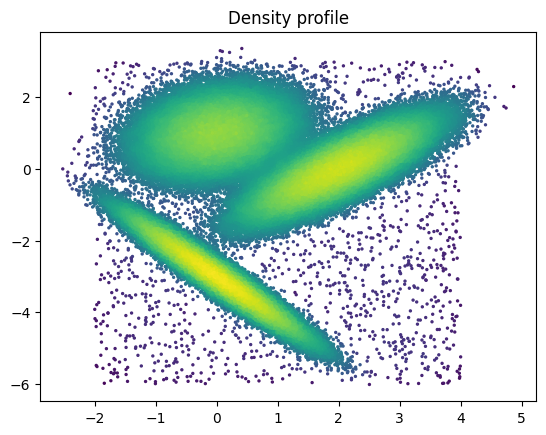

In [6]:
density = data.getDensity()
plt.scatter(data.data[:,0],data.data[:,1], s = 2, c = density)
plt.title("Density profile")

In [24]:
bins = 100
h = np.histogram2d(d[:,0], d[:,1], [bins, bins])

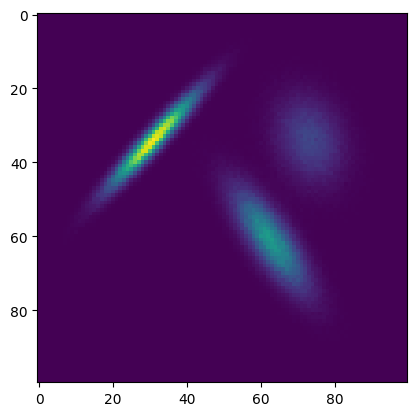

In [25]:
plt.imshow(h[0])

In [26]:
npart = np.sum(h[0], dtype=int)
ogShape = h[0].shape

flat = np.zeros((npart,2))

sqx = (max(d[:,0]) - min(d[:,0]))/bins
sqy = (max(d[:,1]) - min(d[:,1]))/bins
px = [[0,0] for i in range(npart)]
idx = 0
for i in range(ogShape[0]):
    for j in range(ogShape[1]):
        for k in range(int(h[0][i,j])):
            flat[idx] = np.random.rand(2)*np.array([sqx,sqy]) + np.array([i*sqx, j*sqy])
            px[idx] = [i,j]
            idx += 1



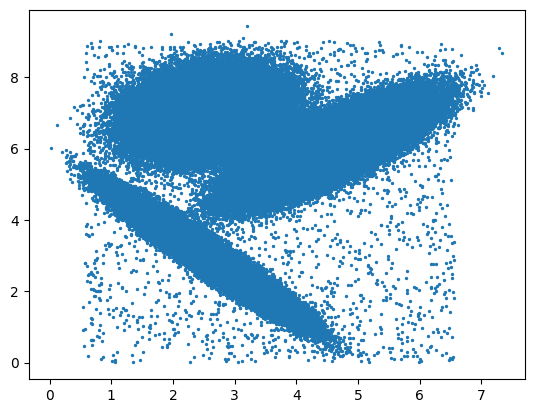

In [27]:
plt.scatter(flat[:,0], flat[:,1], s = 2)

In [28]:
f = Data(flat)
f.computeNeighbors(200)
f.computeIDtwoNN()
f.computeDensity()
f.computeClusteringADP(Z = 3)

Building the KDtree:
	Total time: 1.233s

The root of the tree is
Node 0x12c2b820:
	 array_idx: 243067
	 data:  3.087791  2.246116 
	 parent: (nil)
	 lch: 0x122aa760
	 rch: 0x12eb6130
	 level: 0
	 split_var: 0

KNN search:
Progress 502000/502000 -> 100%
	Total time: 1.558s

ID estimation:
	ID value: 2.008903
	Total time: 0.103s

Density and k* estimation:
	Total time: 1.344s

H1: Preliminary cluster assignment
	Finding putative centers: 0.046s
	Finding actual centers:   0.322s
	Tentative clustering:     0.067s
	Finalizing clustering:    0.000s

	Found 612 clusters
	Total time: 0.435s

H2: Finding border points
	Total time: 0.195s

Using dense implementation
H3: Merging clusters
	Finding merges:   0.001s
	Cluster merging:  0.003s
	Final operations: 0.008s

	Found 1557 possible merges
	Surviving clusters 3
	Total time: 0.012s



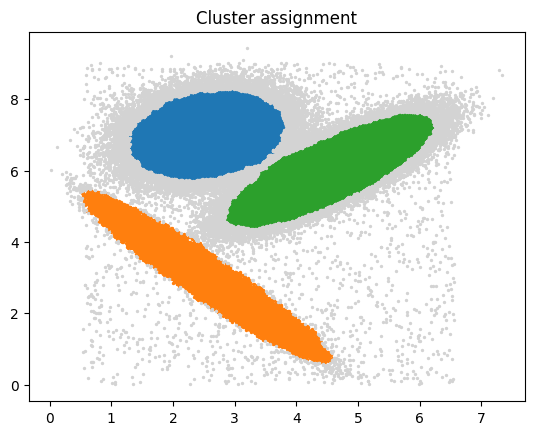

In [29]:
clusterLabels = f.getClusterAssignment()

for cl in set(clusterLabels):
    #print(cl)
    mask = np.where(clusterLabels == cl)
    if cl != -1:
        plt.scatter(f.data[mask,0], f.data[mask,1], s = 2)
    else:
        plt.scatter(f.data[mask,0], f.data[mask,1], s = 2, c = 'lightgray')
plt.title("Cluster assignment")
plt.show()
#plt.legend()

In [32]:
mask = np.zeros(ogShape, dtype = np.int32) - 1
for idx in range(npart):
    p = px[idx]
    #print(mask[p[0],p[1]])
    #mask[p[0],p[1]] = 1 if max(clusterLabels[idx], mask[p[0],p[1]]) > -1 else -1
    mask[p[0],p[1]] = max(clusterLabels[idx], mask[p[0],p[1]]) 


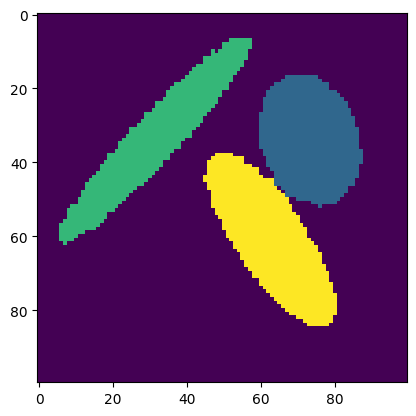

In [33]:
plt.imshow(mask)

In [6]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

x = np.fromfile("dummy.dat", dtype=np.float32)
x = x.reshape((2000,2))

NN = NearestNeighbors(n_neighbors=1001)

In [8]:
NN.fit(x)

NearestNeighbors(n_neighbors=1001)

In [13]:
dist, ngbh = NN.kneighbors(x,1001)

In [14]:
ngbh[0]

array([   0,   95,  156, ...,  653,  629, 1516])

In [15]:
x[1970]

array([9.212156 , 6.4765396], dtype=float32)

In [13]:
from sklearn.neighbors import NearestNeighbors

n = 20000
m = 10
k = 1000
x = np.random.rand(n,m)
nn = NearestNeighbors()

nn.fit(x)
dist, ngbh = nn.kneighbors(x,k)
dd = Data(x)
dd.computeNeighbors(k)
kdngbh, kddist = dd.getNeighbors()

np.where(ngbh != kdngbh)

Building the KDtree:
	Total time: 0.013s

The root of the tree is
Node 0x5785e20:
	 array_idx: 15754
	 data:  0.497891  0.172361  0.914713  0.219340  0.480752  0.464017  0.140516  0.407784  0.226133  0.765715 
	 parent: (nil)
	 lch: 0x5745e90
	 rch: 0x576b060
	 level: 0
	 split_var: 0

KNN search:
Progress 20000/20000 -> 100%
	Total time: 2.849s



(array([], dtype=int64), array([], dtype=int64))